## KNN and bias-variance tradeoff
### Setup: Apply Farming
You own a square apple orchard, measuring 200 meters on each side. You have planted trees in a grid ten meters apart from each other. Last apple season, you measured the yield of each tree in your orchard (in average apples per week). You noticed that the yield of the different trees seems to be higher in some places of the orchard and lower in others, perhaps due to differences in sunlight and soil fertility across the orchard.

Unbeknownst to you, the yield $Y$ of the tree planted $E_1$ meters to the right and $E_2$ meters up from the bottom left-hand corner of the orchard has distribution $Y = ƒ (E) + \epsilon$, where

$$
f(E) = 50 + 0.001E_1^2 + 0.001E_2^2 , \epsilon ~ N(0, \sigma^2), \sigma = 4
$$

The data you collected are as in Figure 1.
The underlying trend is depicted in Figure 2, with the top right-hand corner of the orchard being more fruitful.

### 2.1 2.1	A simple rule to predict this season’s yield (15 points)

This apple season is right around the corner, and you’d like to predict the yield of each tree. You come up with perhaps the simplest possible prediction rule: predict this year’s yield for any given tree based on last year’s yield from that same tree. Without doing any programming, answer the following questions:

1.	What is the training error of such a rule?

Since we are just taking the last year's yield to predict the future yield, the training error would be 0. Because we are essentially copying each data point and turning it into predition.

$$
\begin{align}
\text{Training Error} &= \frac{1}{n} \sum^n_{i=1} (f(E_i) - \hat{f}(E_i)) \\
&= \frac{1}{n} \sum^n_{i=1} (f(E_i) - f(E_i)) \\
&= \frac{1}{n} \times 0 = 0
\end{align}
$$

*Training Error* could also be calle
2.	What is the mean squared bias, mean variance, and expected test error of this prediction rule?

##### For the mean squared bias:

$$
\text{Mean Squared Bias} = \frac{1}{n}\sum_{i=1}^n(E[\hat{f}(x_i)] - f(x_i))^2
$$

Note that $Y_{last} = f(x) + \epsilon_{last}$

So 

$E[Y_{last}] = E[f(x) + \epsilon_{last}] = f(x) + E[\epsilon_{last}]$ 

and since 

$\epsilon \sim N(0, \sigma^2)$, 

$E[Y_{last}] = f(x)$


Thus applying the rule of predicting the yield based solely on last year's yield will give us


$$
\begin{align}
\text{Mean Squared Bias} &= \frac{1}{n}\sum_{i=1}^n(E[Y_{i,last}] - f(x_i))^2 \\
&= \frac{1}{n} \sum_{i=1}^n (f(x_i) - f(x_i))^2 = 0
\end{align}
$$


##### For Mean Variance

As was derrived earlier ($Y_{last}$),

$Var(Y_{last}) = Var(f(x) - \epsilon_{last}) = Var(\epsilon_{last})$. 

This is true because $f(x)$ is a deterministic function for x. So Var(f(x)) = 0. 

And $Var(\epsilon_{last}) = \sigma^2$ based on given. 

Thus, $Var(Y_{last}) = \sigma^2 = 4^2 = 16$.

Therefore the Mean Variance:

$$
\begin{align}
\text{Mean Variance} &= \frac{1}{n}\sum_{i=1}^n(Var(x_i)) \\
&= \frac{1}{n} \sum_{i=1}^n (16) \\
&= \frac{1}{n} \times 16n \\ 
&= 16
\end{align}
$$

#### For Expected Test Error

$$
\text{ETE} = \text{Mean Squared Bias} + \text{Mean Variance} + \text{Irreductible Error}
$$

Note that the Irreductible Error in Y is the variance of the $\epsilon$ term. Therefore,

$Var(\epsilon) = \sigma^2 = 4^2 = 16$

So, 
$$
\text{ETE} = 0 + 16 + 16 = 32
$$

3.	Why is this not the best possible prediction rule?

Determining the future yield using last year's yield on the same tree isn't the best possible prediction rule because it adds 16 from variance to the already noisy irreductible error of 16. This type of modeling captures the irreductible noise/error in our training data and treat it as essential in our predictive function. This isn't ideal because we only want to get the true function to predict the response. It intrudces a new room for error that is the same size as what is unavoidable, irreductible error. Thus making the room for error twice as large when predicting for other dataset outside of the training data.

### 2.2	K-nearest neighbors regression (conceptual) (15 points)

As a second attempt to predict a yield for each tree, you average together last year’s yields of the K trees closest to it (including itself, and breaking ties randomly if necessary). So if you choose K = 1, you get back the simple rule from the previous section. This more general rule is called K-nearest neighbors (KNN) regression (see ISLR p. 105).

KNN is not a parametric model like linear or logistic regression, so it is a little harder to pin down its degrees of freedom.

1.	What happens to the model complexity as K increases? Why?

As K increases, the K-nearest neighbor model becomes less complex because the decision boundary becomes smoother and less sensitive to individual data points. While larger K requires considering more neighbors for each prediction, this does not involve estimating additional parameters. Instead, it averages over more observations, reducing overfitting and simplifying the model’s behavior.

2. The degrees of freedom for KNN is sometimes considered n/K, where n is the training set size. Why might this be the case? [Hint: consider a situation where the data are clumped in groups of K.]

First and foremost, let us ask ourselves "what's the purpose and implication of degrees of freedom?".  

Degrees of freedom  indicates the amount of free variables we have in a model. How many variables can freely choose what values they contain, as the name suggests. 

In K Nearest Neightbhor, we are essentially turning the N data points into clusters of size K. Therefore, the larger K, the less degrees of freedom we have because we are dividing the N points by K, clustering the K nearest points to act as a single unit.

For example, N=100 and K=5. The model will behave as if it has 20 Independent Data Points because we have clustered the N into 20 groups with K size.

TLDR, in clustering the data points into groups with K size, we are reducing the number of (acting) data points. So each  K individual data points nearest to each other will only have one representation in the model.

3.		Conceptually, why might increasing K tend to improve the prediction rule? What does this have to do with the bias-variance tradeoff?

Compere to K=1, increasing K will tend to improve the prediction rule because we are considering the average yield in a specific area. For K=1, we have low bias and high variance. In such case, we are capturing everythign in our data points, including the noises. We are essentially overfitting here. This isn't good if we are trying to generalize the data points outside of the training dataset. If we increase the K, we will increase the bias and will decrease the variance. This ought to reduce the noise captured and only leave us with the essential predictive function of the model.

4. Conceptually, why might increasing K tend to worsen the prediction rule? What does this have to do with the bias-variance tradeoff?

However, if we keep increasing the K further than we ought to do, it will worsen the model in a sense that our model will now become underfitted. Meaning, our model will have high bias and low variance. It's the opposite but as problematic as underfitting because we our loosing essential variety in our model. Meaning, the true predictive function in our data is being treated as noise. This is vast over-generalization. This just one way of telling our model to average all data points and return the calculated average as prediction every time, regardless of data points (this is called as a base model).

The key for a good model is to find the sweet spot between variance and bias, essentially minimizing bias + variance.

### 2.3	K-nearest neighbors regression (simulation) (25 points)
Now, we try KNN for several values of K. For each value of K, we use a numerical simulation to compute the bias and variance for every tree in the orchard. These results are contained in training_results_summary below.


In [4]:
import pyreadr
import pandas as pd

result = pyreadr.read_r('training_results_summary.rds')
df = result[None]
print("SHAPE: ", df.shape)
print("INFO: ", df.info())
df.head()

SHAPE:  (6174, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6174 entries, 0 to 6173
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   K         6174 non-null   float64
 1   X1        6174 non-null   float64
 2   X2        6174 non-null   float64
 3   bias      6174 non-null   float64
 4   variance  6174 non-null   float64
dtypes: float64(5)
memory usage: 241.3 KB
INFO:  None


,K,X1,X2,bias,variance
0,1.0,0.0,0.0,-0.250,16.2
1,1.0,0.0,10.0,0.140,12.2
2,1.0,0.0,20.0,-0.523,20.4
3,1.0,0.0,30.0,0.109,15.6
4,1.0,0.0,40.0,-0.566,21.4


In [5]:
df.to_csv("training_results_summary.csv")

In [6]:
df['K'].value_counts()

K
4.0     662
1.0     651
5.0     644
10.0    631
8.0     613
2.0     611
3.0     601
9.0     591
7.0     586
6.0     584
Name: count, dtype: int64

In [7]:
df.describe()

,K,X1,X2,bias,variance
count,6174.00000,6174.0,6174.000000,6174.000000,6174.000000
mean,5.45562,0.0,44.980564,0.002458,17.589714
std,2.88489,0.0,28.727389,0.498698,4.305599
min,1.00000,0.0,0.000000,-2.059342,10.000889
25%,3.00000,0.0,20.000000,-0.332027,13.951560
50%,5.00000,0.0,40.000000,0.002586,17.635789
75%,8.00000,0.0,70.000000,0.339294,21.317773
max,10.00000,0.0,90.000000,1.971670,24.999702


1.	Create a new tibble called overall_results the contains the mean squared bias, mean variance, and expected test error for each value of K. This tibble should have four columns: K, mean_sq_bias, mean_variance, and expected_test_error.

In [8]:
def yield_function(X1, X2):
    return 50+ 0.001*X1**2 + 0.001*X2**2 

In [9]:
df['bias_sq'] = df['bias']**2
irreductible_error = 16
df['expected_test_error'] = df['bias_sq'] + df['variance'] + irreductible_error
overall_results = df.groupby("K").mean().rename(columns={"bias_sq": "bias_sq_mean", "variance": "variance_mean"})
overall_results = overall_results[["bias_sq_mean", "variance_mean", "expected_test_error"]]
overall_results

,bias_sq_mean,variance_mean,expected_test_error
K,,,
1.0,0.279816,17.487842,33.767657
2.0,0.256027,17.351614,33.607641
3.0,0.226636,17.690798,33.917434
4.0,0.264448,17.724236,33.988684
5.0,0.255017,17.768730,34.023747
6.0,0.252016,17.326262,33.578278
7.0,0.244077,17.710189,33.954266
8.0,0.231901,17.563369,33.795270
9.0,0.232287,17.641304,33.873590


2.	Using overall_results, plot the mean squared bias, mean variance, and expected test error on the same axes as a function of K. Based on this plot, what is the optimal value of K?

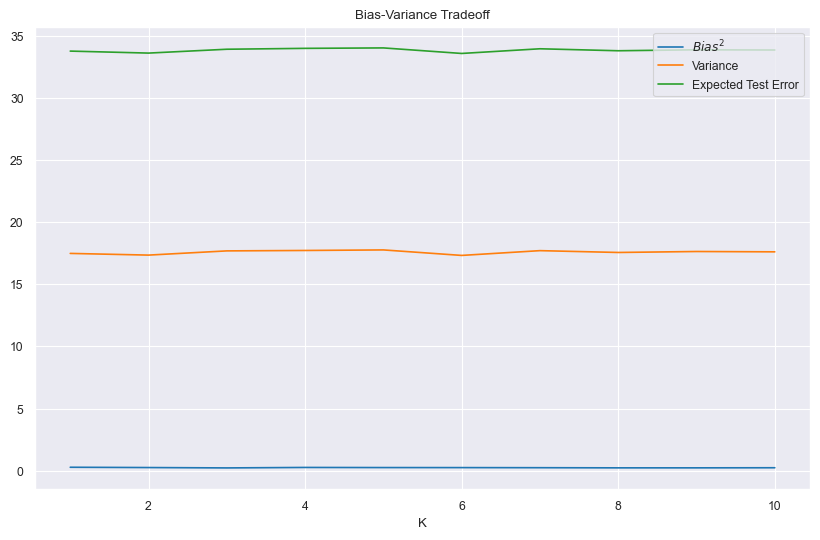

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("paper")
sns.set_style("darkgrid")

plt.figure(figsize=(10, 6))
plt.plot(overall_results.index, overall_results["bias_sq_mean"], label="$Bias^2$")
plt.plot(overall_results.index, overall_results["variance_mean"], label="Variance")
plt.plot(overall_results.index, overall_results["expected_test_error"], label="Expected Test Error")

plt.title("Bias-Variance Tradeoff")
plt.xlabel("K")
plt.legend()
plt.show();

This is rather surprising, it appears as though there are little to no changes in error for all K. We have ourselves full with this faulty dataset. Maybe KNN isn't the best model for our case. But let's explore some more and see if we miss something.

In [11]:
result = pyreadr.read_r('training_results_summary.rds')
df = result[None]
print("SHAPE: ", df.shape)
print("INFO: ", df.info())
df.head()

SHAPE:  (6174, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6174 entries, 0 to 6173
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   K         6174 non-null   float64
 1   X1        6174 non-null   float64
 2   X2        6174 non-null   float64
 3   bias      6174 non-null   float64
 4   variance  6174 non-null   float64
dtypes: float64(5)
memory usage: 241.3 KB
INFO:  None


,K,X1,X2,bias,variance
0,1.0,0.0,0.0,-0.250,16.2
1,1.0,0.0,10.0,0.140,12.2
2,1.0,0.0,20.0,-0.523,20.4
3,1.0,0.0,30.0,0.109,15.6
4,1.0,0.0,40.0,-0.566,21.4


In [12]:
df.nunique()

K             10
X1             1
X2            10
bias        6174
variance    6173
dtype: int64

Wait, isn't his field a 200 by 200 field. So there should at least be $\frac{1}{10}(200 \times 200)$ different combinations of X1 and X2. So it is indeed faulty because we are only getting 1 row of trees instead of 10. Nonetheless, let us proceed.

3. We are used to the bias decreasing and the variance increasing when going from left to right in the plot. Here, the trend seems to be reversed. Why is this the case?

The trend seems to act in reverse because it average over larger neighbours for larger K value in KNN contributes to higher smoothing effect. This smoothing creates less variance (less peaks and valleys in predictions) However, it also increases bias (as in less capacity for complex decision boundaries). This is normal KNN behavior — the traditional bias-variance relationship is still there, but K behaves in the opposite direction to how we usually show model complexity. A higher K means simple models (on the right side of your plot), a lower K means complex models (left side).

4. The mean squared bias has a strange bump between K = 1 and K = 5, increasing from K = 1 to K = 2 but then decreasing from K = 2 to K = 5. Why does this bump occur? [Hint: Think about the rectangular grid configuration of the trees. So for a given tree, the closest tree is itself, and then thenext closest four trees are the ones that are one tree up, down, left, and right from it.]

This is primarily due to the gridlike pattern of the trees. When K=1, we only uses the tree itself, which results in a symmetric pattern because we are only using the point itself as reference but the bias increases when we include another tree because it assumes that the pattern and prediction has a certain direction to it, breaking the said symmetry. However it continues to decrease from K=2 to K=5 because it begins to add references from other directions as well, restoring the symmetry in prediction in the process.

5. Based on the information in training_results_summary, which tree and which value of K gives the overall highest absolute bias? Does the sign of the bias make sense? Why do this particular tree and this particular value of K give us the largest absolute bias?

In [42]:
bias_ind_k = abs(df['bias']).argmax()
df.iloc[bias_ind_k]

K            1.000000
X1           0.000000
X2          70.000000
bias        -2.059342
variance    13.856935
Name: 3657, dtype: float64

The negative sign makes sense as this tree is at the grid edge (X1=0) where it lacks neighbors in one direction. With K=1, it only uses itself for prediction, causing it to systematically underestimate values.

This combination produces maximum bias because:

- Edge position limits available information
- K=1 prevents it from using neighbors to balance predictions
- Its position at X2=70 likely places it in a region with significant data pattern changes

6. Redo the bias-variance plot from part 2, this time putting df = n/K on the x-axis. What do we notice about the variance as a function of df?

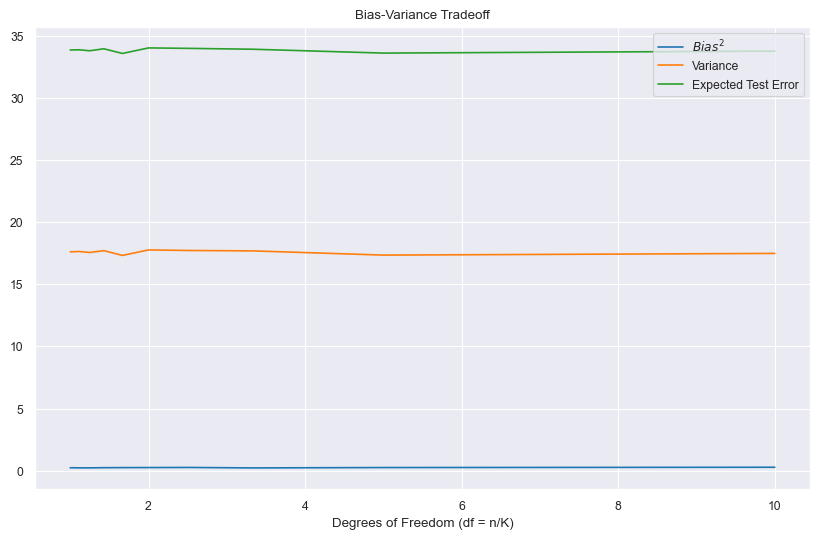

In [44]:
n=10
df_values = [n/k for k in overall_results.index]

df_overall_results = pd.DataFrame({
    'bias_sq_mean': overall_results['bias_sq_mean'].values,
    'variance_mean': overall_results['variance_mean'].values,
    'expected_test_error': overall_results['expected_test_error'].values,
    'df': df_values
})

df_overall_results = df_overall_results.set_index('df').sort_index()

plt.figure(figsize=(10, 6))
plt.plot(df_overall_results.index, df_overall_results["bias_sq_mean"], label="$Bias^2$")
plt.plot(df_overall_results.index, df_overall_results["variance_mean"], label="Variance")
plt.plot(df_overall_results.index, df_overall_results["expected_test_error"], label="Expected Test Error")

plt.title("Bias-Variance Tradeoff")
plt.xlabel("Degrees of Freedom (df = n/K)")
plt.legend()
plt.show()

Looking at the plot with df = n/K on the x-axis, we notice:
- Variance shrinks a little as degree of freedom increases (left to right)
- This is the opposite of what classical bias-variance theory would predict, as one would usually expect a higher degree of freedom to imply a higher variance
- There is an almost linear relation with slight negative slope
- This counterintuitive pattern is true for KNN, and on this dataset with this grid structure, where smaller K (thus higher df) does not mean higher variance

7. Derive a formula for the KNN mean variance. [Hint: First, write down an expression for the KNN prediction for a given tree. Then, compute the variance of this quantity using the fact that the variance of the average of N independent random variables each with variance s2 is s2/N . Finally, compute the mean variance by averaging over trees.]

For a tree at position $E$, the KNN prediction is:
$$\hat{Y}_E = \frac{1}{K} \sum_{i \in N_K(E)} Y_i$$
where $N_K(E)$ is the set of $K$ nearest neighbors of tree $E$.

$$\text{Var}(\hat{Y}_E) = \text{Var}\left(\frac{1}{K} \sum_{i \in N_K(E)} Y_i\right)$$

Each tree yield has variance $\sigma^2 = 16$:
$$\text{Var}(\hat{Y}_E) = \frac{1}{K^2} \sum_{i \in N_K(E)} \text{Var}(Y_i) = \frac{1}{K^2} \cdot K \cdot \sigma^2 = \frac{\sigma^2}{K} = \frac{16}{K}$$

$$\text{Mean Variance} = \frac{1}{n} \sum_{E=1}^n \text{Var}(\hat{Y}_E) = \frac{1}{n} \sum_{E=1}^n \frac{\sigma^2}{K} = \frac{\sigma^2}{K} = \frac{16}{K}$$

Therefore, the KNN mean variance is $\frac{16}{K}$, where 16 is the variance of individual tree yield observations.

8. Create a plot like that in part 6, but with the mean variance formula from part 7 superimposed as a dashed curve. Do these two variance curves match?

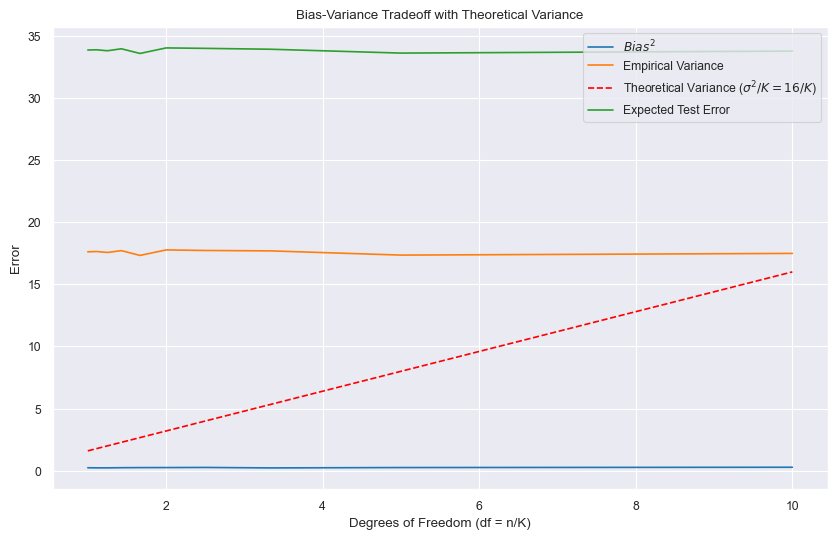

In [45]:
df_overall_results = pd.DataFrame({
    'bias_sq_mean': overall_results['bias_sq_mean'].values,
    'variance_mean': overall_results['variance_mean'].values,
    'expected_test_error': overall_results['expected_test_error'].values,
    'df': df_values,
    'K': overall_results.index
})

df_overall_results = df_overall_results.sort_values('df')

# theoretical variance using the formula
sigma_squared = 16
df_overall_results['theoretical_variance'] = sigma_squared / df_overall_results['K']

plt.figure(figsize=(10, 6))
plt.plot(df_overall_results['df'], df_overall_results["bias_sq_mean"], label="$Bias^2$")
plt.plot(df_overall_results['df'], df_overall_results["variance_mean"], label="Empirical Variance")
plt.plot(df_overall_results['df'], df_overall_results["theoretical_variance"], 'r--', label="Theoretical Variance ($σ^2/K = 16/K$)")
plt.plot(df_overall_results['df'], df_overall_results["expected_test_error"], label="Expected Test Error")

plt.title("Bias-Variance Tradeoff with Theoretical Variance")
plt.xlabel("Degrees of Freedom (df = n/K)")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.show()

Do these two variance curves match?

It appears that The curves don't match. The theoritical variance (red dashed line) increases linearly with df while the actual variance (orange solid line) remains relatively uniformed.

This is probably because the theorithical formula assumes indepence in obsevation when tree could have a spatial correlation. Another reason is that the theorethical formula doesn't account for grid structure of our dataset. Another probable reason is that we have faulty dataset, as was seen earlier, we only get one row of data which is faulty in and of itself.

This highlights the importance of Exploratory Data Analysis and making sure that all the assumptions are met before any modelling approach can be done.